<h1>Simulator</h1>

<p>This notebook is meant to demonstrate the functionality of the simulator. I will provide a series of code examples along with visualizations to demonstrate what it enables</p>

<h2>Import packages</h2>

In [1]:
import os
from PIL import Image
import numpy as np
import trimesh
import warnings
# warnings.filterwarnings("ignore")

import meshplot as mp
from pterotactyl.simulator.scene import sampler
from pterotactyl.simulator.physics import grasping
from pterotactyl.utility import utils
import pterotactyl.objects as objects



pybullet build time: Oct 11 2021 20:59:39


<h2>Select object</h2>

In [2]:
OBJ_LOCATION = os.path.join(os.path.dirname(objects.__file__), "test_objects/0")
batch = [OBJ_LOCATION]

<h2>Visualize object to be touched (OPTIONAL)</h2>

In [6]:
verts, faces = utils.load_mesh_touch(OBJ_LOCATION + '.obj')
plot = mp.plot(verts.data.cpu().numpy(), faces.data.cpu().numpy())

/private/home/ejsmith/.local/lib/python3.8/site-packages/jupyter_client/session.py:716: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0, 0.0,…

<h2> Start the simulator and load the batch </h2>

Here we setup the grasping environment, indicating that the batchsize is 1, that we want vision signals outputted, and that the resolution of the images should be 256 by 256. We then load the object into the simulator, and set the object scale to be 1/2.6 .

In [3]:
s = sampler.Sampler(grasping.Agnostic_Grasp, bs=1, vision=True, resolution = [256, 256])
s.load_objects(batch, from_dataset=False, scale = 2.6)

<h2> Perform an action </h2>

In [4]:
action = [30]
parameters = [[[.3, .3, .3], [60, 0, 135]]]
signals = s.sample(action, touch=True, touch_point_cloud=True, vision=True, vision_occluded=True,parameters=parameters )

<h2> Observe results </h2>

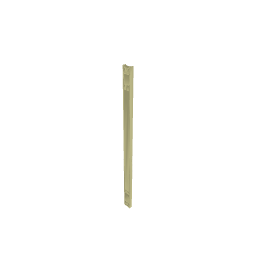

In [6]:
img_vision = Image.fromarray(signals["vision"][0])
display(img_vision)


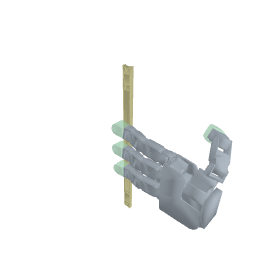

In [7]:
img_vision_grasp = Image.fromarray(signals["vision_occluded"][0])
display(img_vision_grasp)

Finger 0 has status touch
Finger 1 has status touch
Finger 2 has status touch
Finger 3 has status no_touch
 
     TOUCH         DEPTH


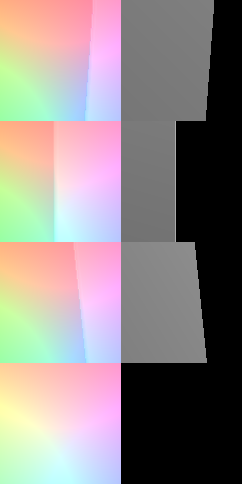

In [8]:
image = np.zeros((121*4, 121*2, 3)).astype(np.uint8)
for i in range(4):
    print(f'Finger {i} has status {signals["touch_status"][0][i]}')
    touch = signals["touch_signal"][0][i].data.numpy().astype(np.uint8)
    image[i*121:i*121+121, :121] = touch
    depth = utils.visualize_depth(signals["depths"][0][i].data.numpy()).reshape(121, 121, 1)
    image[i*121:i*121+121, 121:] = depth
print(' ')
print('     TOUCH         DEPTH')
display(Image.fromarray(image))


<h2> Visualize the touches </h2>

In [7]:
points = []
plot = mp.plot(verts.data.cpu().numpy(), faces.data.cpu().numpy())
for p in signals["touch_point_cloud"][0]:
    if p.shape[0] >0:
        points.append(p)
points = np.concatenate(points).reshape(-1,3)

plot.add_points(points, c=points.sum(axis=1),  shading={ "point_size": 0.03})


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0, 0.0,…

1

<h2> Perfrom new actions </h2>

In [9]:
action = [40]
parameters = [[[0.35, -0.35, 0.3], [60, 0, 45]]]
signals = s.sample(action, touch=True, touch_point_cloud=False, vision=True, vision_occluded=True,parameters=parameters )

<h2> Observe new results </h2>

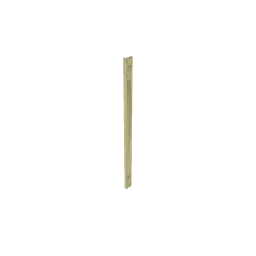

In [11]:
img_vision = Image.fromarray(signals["vision"][0])
display(img_vision)

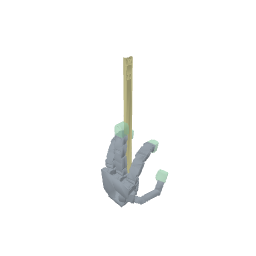

In [10]:
img_vision_grasp = Image.fromarray(signals["vision_occluded"][0])
display(img_vision_grasp)

Finger 0 has status no_touch
Finger 1 has status touch
Finger 2 has status no_touch
Finger 3 has status no_touch
 
     TOUCH         DEPTH


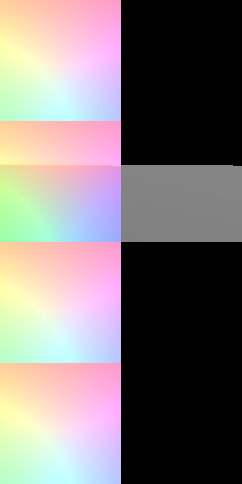

In [12]:
image = np.zeros((121*4, 121*2, 3)).astype(np.uint8)
for i in range(4):
    print(f'Finger {i} has status {signals["touch_status"][0][i]}')
    touch = signals["touch_signal"][0][i].data.numpy().astype(np.uint8)
    image[i*121:i*121+121, :121] = touch
    depth = utils.visualize_depth(signals["depths"][0][i].data.numpy()).reshape(121, 121, 1)
    image[i*121:i*121+121, 121:] = depth
          
print(' ')
print('     TOUCH         DEPTH')
display(Image.fromarray(image))